# 2022 2학기 웹파이썬프로그래밍 텀프로젝트 최종보고서

## 2022102773 영어영문학과 김범수

<h4>(0) 주제:</h4><br>
랜덤 오버샘플링을 활용한 비선형적 오디오 업샘플링과 선형 업샘플링 / Spline 업샘플링과의 비교를 통한 실효성 검증<br>
<br>

<h4>(1) 주제 선정 이유: 왜 이 주제(분야)를 선정하게 된 이유를 나열함</h4><br>
음향 신호 처리에 관심이 많았기에, 델타시그마 DAC의 구조부터 오디오 코덱의 압축 방식 등의 원리를 미약하고 얕게나마 알고 있었음.<br>
평소에 VoIP 서비스 혹은 전화 통화를 사용할 때, 저비트레이트 손실 압축으로 인해 고음역대가 매우 감쇄되어 때때로 목소리의 구분이 힘들 정도로 음질이 좋지 않은 점이 불평이었음. 이 문제점을 해결하기 위해 Python을 통해 오디오 신호 수정과 관련된 프로젝트를 진행하려고 함.<br>
<br>

<h4>(2) 가설 정의: 본인이 Term 프로젝트를 통해서 증명하고자 하는 명제 혹은 밝히고자 하는 논리가 무엇인지 설명함</h4><br>
저비트레이트 통신 코덱에서의 가장 큰 문제점은 원본 신호에 비해 낮은 샘플링 레이트로 인해 고음역대가 손실되는 점임.
이를 해결하기 위해서는 선형적 오버샘플링을 통해, 기존 샘플들 사이사이에 전/후 샘플의 평균값을 넣는 방법이 있음.
하지만, 음성 신호는 선형적인 신호가 아니기 때문에 일반적인 선형 보간법을 통해 복구된 고음역대 신호는 원 음성 신호와 괴리감이 존재할 수 있으며, 선형 보간법은 단지 샘플링 레이트를 증가하기 위한 수단임.<br>

이를 해결하기 위해, 선형 보간법을 통해 복구된 압축된 음성 신호와 원 음성 신호 간의 차이점을 분석하고, 복구 전의 압축된 음성 신호에 이 차이점을 가중치로 적용한 무작위 값을 사용해 다시 보간법을 적용하는 과정을 Python 코드로 작성함.<br>

위와 같은 과정을 통해, 일반적인 선형 보간법이 아닌 무작위 업샘플링을 통해 고음역대가 더욱 잘 복원될 수 있는지 확인하려고 함.<br>
<br>

<h4>(3) 인터넷을 통한 데이터 획득: 위의 명제/논리을 펼치기 위하여, 어디서 Python을 통해 어떻게 데이터를 획득했는지 구체적으로 나열함</h4><br>
프로젝트에 사용할 오디오 샘플은 인터넷 상에서 불러올 것임. 수 천여개의 음성 샘플 중 하나를 무작위로 다운받은 후, WAV 파일을 Python에서 바로 간단하게 처리할 수 있도록 텍스트(PCM RAW   데이터를 추출하여 16진수값으로 저장된 샘플을 10진수)로 변환할 예정이며, 샘플링 레이트가 16000Hz인 PCM 데이터에서 샘플을 제거하여 8000Hz로 리샘플링 하여 손실된 음성 신호를 시뮬레이션함.<br>

프로젝트에서 사용할 수 있는 무료 오디오 샘플들 목록<br>
https://towardsdatascience.com/40-open-source-audio-datasets-for-ml-59dc39d48f06<br>

해당 게시글 중에서 https://github.com/microsoft/MS-SNSD/raw/master/clean_test/ (Microsoft MS-SNSD 음성 샘플 수 천여개가 업로드된 Github Repo)를 선택해, Python urllib 모듈을 사용하여 16비트 / 16000Hz PCM WAV 음성 샘플을 해당 Repository에서 무작위로 다운로드함.<br>

다운로드한 WAV 파일의 헤더 부분과 데이터 부분을 분리, 헤더 부분에서 WAV 파일 재구축에 필요한 정보를 추출하고 데이터 부분을 조작(원본 샘플을 삭제한 후, random 함수를 통한 리샘플링)함. 이후 무작위 샘플 (이전과 이후 샘플 값 사이의 무작위 값)을 추가하여 새롭게 리샘플링된 WAV 파일을 생성하며, 이와 비교 대상으로 선형 보간법, SciPy에 내장된 Spline 등의 보간법을 적용하여 대조할 데이터를 생성함.<br>
<br>

<h4>(4) 분석을 위한 데이터의 가공: 어떻게 어떤 정보를 Python으로 추출했는지 설명함</h4><br>
WAV 파일은 Microsoft사에서 이미 표준으로 제정한 규격이 존재함.<br>

Github에서 불러오는 음성 샘플을 포함하여, 대부분의 WAV 파일은 크게 헤더 부분과 데이터 부분으로 나뉘어져 있음.
WAV 파일의 첫 44바이트 이전까지는 오디오 신호의 특성이 나타나는 헤더 부분이며, 44바이트부터는 실제 음성 데이터가 들어있음.<br>

WAV 파일의 헤더 부분에는 여러 정보가 포함되어 있는데, <b>모든 WAV 파일의 공통된 부분을 제외한, 각 음성 파일마다 다른 부분 몇 가지를 나열하자면</b>:<br>

4바이트 - 7바이트 : WAV 파일의 (전체 바이트 크기 - 8)<br>
22바이트 - 23바이트 : WAV 파일의 채널 수 (1인 경우 모노, 2인 경우 스테레오)<br>
24바이트 - 27바이트 : WAV 파일의 샘플링 레이트 (단위는 Hz)<br>
28바이트 - 31바이트 : WAV 파일의 바이트레이트 (샘플링 레이트 * 샘플 비트 깊이 * 채널 수 / 8)<br>
32바이트 - 33바이트 : WAV 데이터의 블록 크기 (채널 수 * 샘플 비트 깊이 / 8, 단위는 바이트)<br>
34바이트 - 35바이트 : WAV 파일의 샘플 비트 깊이 (정수 범위에서는 비트 깊이 * 6db이 음성 신호의 다이내믹 레인지임)<br>
40바이트 - 43바이트 : WAV 파일 데이터의 길이 (보통 WAV 파일의 바이트 크기 - 헤더의 바이트 크기인 44)<br>

이후 44바이트부터는 음성 신호(little endian 형식으로 되어 있음)가 파일 끝까지 이어짐.<br>
<br>
본 텀프로젝트에서 사용할 샘플은 모두 모노 음원이고 16비트 / 16000Hz 음원으로, WAV 데이터의 블록 크기는 2바이트임.<br>
즉, 44바이트부터 2바이트(=16비트)씩이 음원의 샘플 하나임.<br>
<br>
무작위 보간법을 적용하기 위해 WAV 음원을 44바이트부터 샘플 크기인 2바이트씩 끝까지 읽어들여 포함된 모든 샘플을 추출하여 RAW 데이터 저장용 리스트에 하나씩 저장함.<br>
이후 위 RAW 데이터 저장용 리스트의 아이템을 하나씩 불러들여 rawHexDatatoInt 함수로 signed Integer로 변환, 새로운 INTEGER 저장용 리스트에 변환된 샘플 하나하나를 덧붙임.<br>
이는 10진법 계산을 통해 보간법을 적용하기 용이하게 함. 다만, WAV 파일의 데이터는 정수형이 아니기 때문에, 10진법으로 보간법을 적용한 후 다시 역으로 bytes 타입으로 계산해주는 intDatatoHex 함수를 사용함.<br>
또한, bytes 타입으로 되어있는 44바이트짜리 헤더 원본을 넣으면 이를 해석하여 데이터로 내놓는 extractData 메소드나, 역으로, 저장된 데이터를 기반으로 헤더를 작성해주는 generateData 메소드를 포함한 'header' 클래스를 작성함.<br>
<br>

이후, 음원의 샘플을 홀수로 만들어 보간법 적용을 쉽게 하기 위해, 음원의 샘플 갯수가 짝수인 경우 마지막 샘플(=샘플이 보관된 리스트의 마지막 항목)을 제거하도록 함.<br>
이후, 리샘플링된 음원의 샘플을 보관하는 리스트를 새로 만들고, 원본 음원에서 짝수 번째 샘플을 제외한 샘플들을 append함.<br>
<br>

파일 처리 부분은 코드 작성 초기에는 코드가 너무 길어서 추후 모듈로 분리시킬 예정이었으나, 수 차례 수정을 통해 상당히 짧아져 분리하지 않음.<br>
또한, 현재는 파일 처리 부분에 하드코딩 처리된 부분이 있어 16000Hz와 모노 (채널 수 1개)인 WAV 파일만을 지원함.<br>
현 텀프로젝트에서 사용하는 샘플들에는 문제가 없으나, 삼성의 UHQ Upscaler, 소니의 DSEE HX와 같이 CD급 (16비트 44.1kHz, 스테레오) 음원을 Hi-Res 오디오 급으로 업샘플링하는 프로그램을 추후에 개발하고자 하는데, 이를 위해서 수정할 예정임.<br>
<br>

<h4>(5) 분석 결과 도출: 수학적 방법 혹은 논리적 방법을 Python으로 구현함으로서, 프로그램을 통해서 결과를 도출함</h4><br>
(4)에서 서술한 파일 처리 부분에 이어, 데이터에 보간법을 적용하고 분석된 데이터 (FFT Spectrogram)를 내놓는 코드를 작성함.<br>

보간법은 4가지 방법으로 이루어짐.<br>

1. 일반적인 선형 보간법 (Linear Interpolated)<br>
원본(다운샘플링 이전) WAV 파일의 샘플이 A B C D E F G... 식으로 이루어져 있으면, B D F 를 삭제해 다운샘플링을 진행한 후,<br>
(A+C)/2를 B의 위치에, (C+E)/2를 D의 위치에- 즉, 중간값(평균)을 정수로 반올림한 값을 대입하는 방식으로 선형적인 보간법을 진행함.<br>
<br>

2. 랜덤 보간법 (Random Interpolated)<br>
위 1번 선형 보간법 항목에서 설명한 다운샘플링의 과정 후, A와 C의 평균이 아닌,<br>
정수인 A와 C 사이의 무작위 정수값을 B의 자리에 대입하는 방식으로 보간법을 진행함.<br>
<br>

3. 랜덤-선형 보간법 (Random Interpolated (Limited to Near-median values))<br>
2번 항목의 방법과 비슷하지만, A와 C 사이의 무작위 정수가 아닌,<br>
실직선 상에서 두 값을 표현했을 때, A---Q1---Q2(평균)---Q3---B (A < B 인 경우)에서<br>
Q1과 Q3 사이의 무작위 값을 대입하는 방식으로, 선형 보간법에 조금 더 가까워진 무작위 보간법을 진행함.<br>
<br>

4. Spline 보간법 (Spline Interpolated)<br>
일반적인 선형 보간법은 "참고한 글 6"에서의 첫 자료 사진과 같이, 그저 중간 값을 사용해 샘플링 횟수를 증가하는 방식에 지나지 않음.<br>
이와 더불어, 선형 보간법에서는 원하지 않는 고음역대에서의 왜곡이 발생함.<br>
이를 해결하기 위해 일반적인 선형 보간법이 아닌, 좀 더 부드러운 값을 추가해주는 Spline 보간법을 적용함.<br>
<br>

5. 랜덤 보간법 (Random Interpolated (Limited to mean values of linear-original difference))<br>
선형적인 보간법을 통해 얻은 샘플 값과, 원본 샘플 값의 차이를 계산한 후, 이를 음수와 양수로 구분하여 평균값을 도출함.<br>
이후, 선형 보간법에서 얻은 값을 기준으로, 음수와 양수를 범위로 설정해, 해당 범위 내의 무작위 정수값을 대입함.<br>
<br>

이후, Scipy의 spectrogram과 Matplotlib을 사용해 원본과 위의 5가지 보간법을 적용한 음원의 <b>스펙트로그램</b><br>
: x축은 시간(초), y축은 주파수(Hz), 색은 음압(dB)을 표기하는 그래프<br>
를 통해 고음역대 주파수의 복원과 노이즈의 정도를 눈으로 확인할 수 있으며, 생성된 WAV 파일을 청취하여 보간법의 결과를 확인할 수 있음.

<h4>(6) 결론: 본인의 명제/논리가 증명/확인 되었는지와 이를 구체적으로 서술함</h4><br>
랜덤 보간법과 Spline 보간법 모두 주관적인 청감 평가 및 FFT 상, 원본에 비해 음질이 저하됨을 느낄 수 있었음.<br>
특히 2번과 5번은 실 청감 상으로나, FFT 상으로나 노이즈가 상당히 유입되어 있어 선형 보간법보다 음질이 저하되며, 고음역대의 복원에도 불구하고 언더샘플링된 음원보다도 음성을 인식하기가 어려운 구간이 여럿 존재함.<br>

하지만, 3번(랜덤-선형 보간법)과 4번(Spline)보간법은 원본에 비해 음질이 소폭 떨어질지언정, 기존 언더샘플링된 음원보다 음성을 인식하기에 용이하며, 기존 선형 보간법에서 발생한 Aliasing 현상 (저음역대의 음원이 고음역대에서 나타나는 현상)이 비교적 작게 나타남.<br>

<b>즉, 선형 보간법과 랜덤 보간법을 절충한 보간법으로 선형 보간법보다 고음역대 복원이 잘 이루어짐을 확인하였음.</b><br>

추가적으로, 4번(Spline) 보간법은 고음역대의 이미징 현상이 크게 나타나지 않는 점이 인상적이었으며, <br>
현재는 코드 실행 시간의 문제로 인해 이루어내지 못했으나, (특히 Spline 보간법 실행 시, 오디오의 길이가 길어질수록 코드 실행 시간이 10분 이상 소요)<br>
후속 연구로 Spline 보간법을 최적화하고 랜덤 보간법을 동시에 활용하여 더욱 뛰어난 업샘플링 방법을 만들어보고 싶음.<br>

또한, 이 프로젝트에서는 오디오를 다운샘플링 시킬 시 짝수 번째 샘플을 일괄적으로 삭제하였으나, 현 대부분 음향 소프트웨어는 이 방식으로 샘플링 레이트를 낮추지 않음.<br>
수학/공학적 역량 부족과 코드 구현의 한계로 이러한 일방적인 다운샘플링을 할 수 밖에 없었으나, 이러한 일괄적인 삭제는 위에 서술한 바 있는 Aliasing을 발생시킴.<br>
이를 해결하기 위해서는 Anti-Aliasing 과정이 필요한데, 로우패스 필터를 적용한 후 샘플을 제거하는 방법임.<br>
<br>

<h4>(7) 참고문헌: 위의 작업을 위하여 획득한 자료, 인터넷 정보, 논문, 도서 등을 나열함</h4><br>
참고한 글 1. 랜덤 오버샘플링을 통해 Nyquist Frequency 이상의 음역대를 추가하면 손실이 발생하는가?<br>
https://dsp.stackexchange.com/questions/43056/random-over-sampling-signal-and-perfect-reconstruction-in-nyquist-form<br>
<br>
참고한 글 2. 선행 연구. 뉴럴 네트워크를 통한 업샘플링.<br>
단, 본 텀프로젝트에서는 해당 연구와는 다르게 Tensorflow 등 뉴럴 네트워크를 사용하지 않고,<br>
무작위 샘플 대입과 원본 비교를 통한 가중치 부여를 수 차례 진행하여 오디오 업샘플링을 수행할 예정임.<br>
https://kuleshov.github.io/audio-super-res/# 및 https://arxiv.org/abs/1708.00853<br>
<br>
참고한 글 3. Python을 활용한 주파수 분석 (FFT)<br>
https://pinkwink.kr/1370<br>
<br>
참고한 글 4. PCM 신호를 텍스트로 표현하기<br>
본 텀프로젝트에는 큰 도움이 되지 않을 것으로 보임.<br>
https://manual.audacityteam.org/man/sample_data_import.html<br>
<br>
참고한 글 5. WAV 파일의 구조<br>
https://docs.fileformat.com/audio/wav/<br>
<br>
참고한 글 6. Spline 보간법의 이해<br>
https://helloworldpark.github.io/jekyll/update/2017/02/04/Spline.html<br>
<br>
참고한 글 7. Scipy의 Spectrogram<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html<br>
<br>

<h4>(8) 별첨: (3)의 획득한 데이터 원본</h4><br>
https://github.com/microsoft/MS-SNSD/raw/master/clean_test/clnsp{0}.wav<br>
{0}은 0부터 1000까지 랜덤한 정수.<br>

본 ipynb가 첨부된 zip 파일 내에 Sample 1, 2, 3 폴더 내의 "dl_wav_file.wav" 파일이 위의 방식으로 획득한 원본 음향 샘플임.<br>

In [15]:
import IPython
# Sample 1 원본 WAV
IPython.display.Audio("./Sample 1/dl_wav_file.wav")

In [16]:
IPython.display.Audio("./Sample 2/dl_wav_file.wav")
# Sample 2 원본 WAV

In [17]:
IPython.display.Audio("./Sample 3/dl_wav_file.wav")
# Sample 3 원본 WAV

<h4>(9) 별첨: (4)의 가공된 데이터 원본</h4><br>
<b>Sample 1의 FFT</b><br>
<img src="./Sample 1/Figure_1.png"><br>
<br>

<b>Sample 2의 FFT</b><br>
<img src="./Sample 2/Figure_1.png"><br>
<br>

<b>Sample 3의 FFT</b><br>
<img src="./Sample 3/Figure_1.png"><br>
<br>

<h3>WAV 오디오 원본은 본 ipynb가 위치한 폴더 내에 위치한 각 "Sample <i>숫자</i>" 폴더 내에 포함되어 있음.<h3>

<h4>(10) 별첨: (3)을 (4)로 변환하는 등의 작업을 위하여 본인이 직접 개발한 Python 소스코드 원본</h4><br>

아래 Cell 내의 코드 혹은 폴더 내 main.py 모두 동일한 코드임.

/Users/piscis_austrinus/opt/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


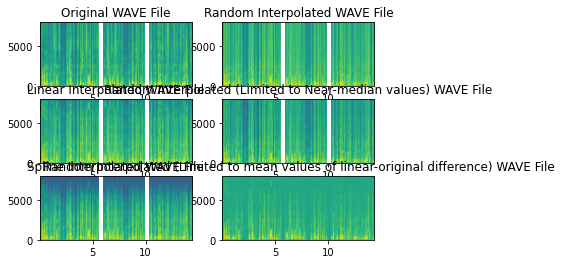

In [1]:
# import libraries for resampling, fft spectrogram view and etc.
import random
import urllib.request
import copy
import matplotlib.pyplot as pyplot
import scipy.interpolate as interpolate

# Define class: WAV file header translation
class header:
    inputHeader = bytes()

    # Define the default values which should be replaced by 'extractData' method.
    chunkSize_4to7 = 0
    chunkSize_16to19 = 16
    numberOfChannels = 1
    sampleRate = 0
    byteRate = 0
    blockAlign = 0
    bitsPerSample = 16
    chunkSize_40to43 = 0

    byte_chunkSize_4to7 = None
    byte_chunkSize_16to19 = None
    byte_numberOfChannels = None
    byte_sampleRate = None
    byte_byteRate = None
    byte_blockAlign = None
    byte_bitsPerSample = None
    byte_chunkSize_40to43 = None

    def extractData(self):
        self.chunkSize_4to7 = int.from_bytes(self.inputHeader[4:8], "little", signed=True)
        self.chunkSize_16to19 = int.from_bytes(self.inputHeader[16:20], "little", signed=True)
        self.numberOfChannels = int.from_bytes(self.inputHeader[22:24], "little", signed=True)
        self.sampleRate = int.from_bytes(self.inputHeader[24:28], "little", signed=True)
        self.byteRate = int.from_bytes(self.inputHeader[28:32], "little", signed=True)
        self.blockAlign = int.from_bytes(self.inputHeader[32:34], "little", signed=True)
        self.bitsPerSample = int.from_bytes(self.inputHeader[34:36], "little", signed=True)
        self.chunkSize_40to43 = int.from_bytes(self.inputHeader[40:44], "little", signed=True)

    def generateData(self):
        self.byte_chunkSize_4to7 = (self.chunkSize_4to7).to_bytes(4, "little")
        self.byte_chunkSize_16to19 = (self.chunkSize_16to19).to_bytes(4, "little")
        self.byte_numberOfChannels = (self.numberOfChannels).to_bytes(2, "little")
        self.byte_sampleRate = (self.sampleRate).to_bytes(4, "little")
        self.byte_byteRate = (self.byteRate).to_bytes(4, "little")
        self.byte_blockAlign = (self.blockAlign).to_bytes(2, "little")
        self.byte_bitsPerSample = (self.bitsPerSample).to_bytes(2, "little")
        self.byte_chunkSize_40to43 = (self.chunkSize_40to43).to_bytes(4, "little")

        newHeaderString = "RIFF" + str(self.byte_chunkSize_4to7)[2:-1] + "WAVEfmt " + str(self.byte_chunkSize_16to19)[2:-1] + "\\x01\\x00" + str(self.byte_numberOfChannels)[2:-1] + str(self.byte_sampleRate)[2:-1] + str(self.byte_byteRate)[2:-1] + str(self.byte_blockAlign)[2:-1] + str(self.byte_bitsPerSample)[2:-1] + "data" + str(self.byte_chunkSize_40to43)[2:-1] 
        self.inputHeader = bytes(newHeaderString, "ascii")
        self.inputHeader = self.inputHeader.decode('unicode_escape').encode('raw_unicode_escape')

# Define function: Create new list with integer from list with raw byte data
def rawHexDatatoInt(rawData, intData):
    for counter in range(len(rawData)):
        integerData = int.from_bytes(rawData[counter], "little", signed=True)
        intData.append(integerData)

# Define function: Create new list with raw byte data from list with signed (with +/- signs) little endian 16 bit integers
# All audio samples used in this project are in 2 bytes
def intDatatoHex(intData, rawData):
    for samples in intData:
        if samples < 0:
            byteData = (samples + 2**16).to_bytes(2, "little")
        else:
            byteData = samples.to_bytes(2, "little")
        rawData.append(byteData)

# Fetch random audio file from server: https://dagshub.com/hazalkl/MS-SNSD/src/master/Data/clean_test (MS-SNSD by Microsoft Corporation, MIT License)
# All of the audio files are in Signed PCM 16bit / 16000kHz
randomSample = random.randint(0,1000)
sampleUrl = "https://github.com/microsoft/MS-SNSD/raw/master/clean_test/clnsp{0}.wav".format(randomSample)
urllib.request.urlretrieve(sampleUrl, "dl_wav_file.wav")

# Extract header, raw data from WAV file
# Read the wav file from offset 44, which is the start point of raw PCM data
# 2 bytes = 1 sample (btw, all of the samples are in mono channel) / little endian
original_file_data_raw = []

with open("dl_wav_file.wav", "rb") as original_file_binary:
    byteStep = 2
    original_file_header = header()
    original_file_header.inputHeader = original_file_binary.read(44)
    original_file_header.extractData()

    for i in range(0, int(original_file_header.chunkSize_40to43 / 2)):
        # 44 byte is the starting point of the raw PCM data, but we have already read the file to that point when reading the header of the file.
        original_file_data_raw.append(original_file_binary.read(byteStep))

# Raw data conversion to SIGNED integer
original_file_data_signed_int = []
rawHexDatatoInt(original_file_data_raw, original_file_data_signed_int)

# Resample (Sample truncation) the retreived wav file to 8000Hz (half the samplerate of the original file)
truncated_file_data_raw = []
truncated_file_data_signed_int = []

truncated_file_header = copy.copy(original_file_header)
for samples in range(len(original_file_data_raw)):
    if samples % 2 == 0:
        truncated_file_data_raw.append(original_file_data_raw[samples])
        truncated_file_data_signed_int.append(original_file_data_signed_int[samples])
    else:
        continue
truncated_file_header.chunkSize_4to7 = 44 + (len(truncated_file_data_raw) * 2) - 8
truncated_file_header.chunkSize_40to43 = len(truncated_file_data_raw) * 2
truncated_file_header.sampleRate = 8000
truncated_file_header.byteRate = 2 * truncated_file_header.sampleRate * 1
truncated_file_header.generateData()

# Create new file: resampled data
with open('truncated_wav_file.wav', 'wb') as truncated_wav_file:
    truncated_wav_file.write(truncated_file_header.inputHeader)
    for samples in truncated_file_data_raw:
        truncated_wav_file.write(samples)

# Create new file: One sample deleted original data if original file has even sample number
if len(original_file_data_raw) % 2 == 0:
    with open('mod_original_wav_file.wav', 'wb') as mod_original_wav_file:
        mod_original_wav_file_header = copy.copy(original_file_header)
        mod_original_wav_file_header.chunkSize_4to7 -= 2
        mod_original_wav_file_header.chunkSize_40to43 -= 2
        mod_original_wav_file_header.generateData()
        mod_original_wav_file.write(mod_original_wav_file_header.inputHeader)
        for samples in range(len(original_file_data_raw) - 1):
            mod_original_wav_file.write(original_file_data_raw[samples])
else:
    with open('mod_original_wav_file.wav', 'wb') as mod_original_wav_file:
        mod_original_wav_file_header = copy.copy(original_file_header)
        mod_original_wav_file_header.generateData()
        mod_original_wav_file.write(mod_original_wav_file_header.inputHeader)
        for samples in range(len(original_file_data_raw)):
            mod_original_wav_file.write(original_file_data_raw[samples])
### End of Pre-Processing Section

### Start of Interpolation Section
# We have the data of the resampled (downsampled) audio as truncated_wav_*
# First method of interpolation: linear interpolation
linear_interpolated_data_signed_int = []
linear_interpolated_data_raw = []

for samples in range(len(truncated_file_data_signed_int) - 1):
    median_data = round((truncated_file_data_signed_int[samples] + truncated_file_data_signed_int[samples + 1]) / 2)
    linear_interpolated_data_signed_int.append(truncated_file_data_signed_int[samples])
    linear_interpolated_data_signed_int.append(median_data)

linear_interpolated_data_signed_int.append(truncated_file_data_signed_int[-1]) # The last one should not be interpolated
intDatatoHex(linear_interpolated_data_signed_int, linear_interpolated_data_raw)

# Save the linear interpolated data into "linear_interpolated_wav_file.wav"
# Reuse the header of mod_original_wav_file_header as it has same sample length and audio characteristics
with open('linear_interpolated_wav_file.wav', 'wb') as linear_interpolated_wav_file:
    linear_interpolated_wav_file.write(mod_original_wav_file_header.inputHeader)
    for samples in linear_interpolated_data_raw:
        linear_interpolated_wav_file.write(samples)

# Second method of interpolation: Random-value-between-samples
# Select the random integers between the samples and put them between the original samples
random_interpolated_data_signed_int = []
random_interpolated_data_raw = []

for samples in range(len(truncated_file_data_signed_int) - 1):
    if truncated_file_data_signed_int[samples] > truncated_file_data_signed_int[samples + 1]:
        randomSample = random.randint(truncated_file_data_signed_int[samples + 1], truncated_file_data_signed_int[samples])
    elif truncated_file_data_signed_int[samples] < truncated_file_data_signed_int[samples + 1]:
        randomSample = random.randint(truncated_file_data_signed_int[samples], truncated_file_data_signed_int[samples + 1])
    else: # ==
        randomSample = truncated_file_data_signed_int[samples]
    
    random_interpolated_data_signed_int.append(truncated_file_data_signed_int[samples])
    random_interpolated_data_signed_int.append(randomSample)

random_interpolated_data_signed_int.append(truncated_file_data_signed_int[-1])
intDatatoHex(random_interpolated_data_signed_int, random_interpolated_data_raw)

with open('random_interpolated_wav_file.wav', 'wb') as random_interpolated_wav_file:
    random_interpolated_wav_file.write(mod_original_wav_file_header.inputHeader)
    for samples in random_interpolated_data_raw:
        random_interpolated_wav_file.write(samples)

# Third method of interpolation: Random-value-between-samples v2
# Random upsampling, but with a bit of linear sampling characteristics, by using limiting the range of random samples to Q2-Q4 range.
quarter_random_interpolated_data_signed_int = []
quarter_random_interpolated_data_raw = []

def quarterCalc(first, fourth):
    q1 = first
    q4 = fourth
    median = (first + fourth) / 2
    q2 = (q1 + median) / 2
    q3 = (q4 + median) / 2

    secondFourthList = []
    secondFourthList.append(q2)
    secondFourthList.append(q3)
    return secondFourthList
        
for samples in range(len(truncated_file_data_signed_int) - 1):
    if truncated_file_data_signed_int[samples] > truncated_file_data_signed_int[samples + 1]:
        quarters = quarterCalc(truncated_file_data_signed_int[samples + 1], truncated_file_data_signed_int[samples])
        randomSample = random.randint(round(quarters[0]), round(quarters[1]))
    elif truncated_file_data_signed_int[samples] < truncated_file_data_signed_int[samples + 1]:
        quarters = quarterCalc(truncated_file_data_signed_int[samples], truncated_file_data_signed_int[samples + 1])
        randomSample = random.randint(round(quarters[0]), round(quarters[1]))
    else: # ==
        randomSample = truncated_file_data_signed_int[samples]
    
    quarter_random_interpolated_data_signed_int.append(truncated_file_data_signed_int[samples])
    quarter_random_interpolated_data_signed_int.append(randomSample)

quarter_random_interpolated_data_signed_int.append(truncated_file_data_signed_int[-1])
intDatatoHex(quarter_random_interpolated_data_signed_int, quarter_random_interpolated_data_raw)

with open('quarter_random_interpolated_wav_file.wav', 'wb') as quarter_random_interpolated_wav_file:
    quarter_random_interpolated_wav_file.write(mod_original_wav_file_header.inputHeader)
    for samples in quarter_random_interpolated_data_raw:
        quarter_random_interpolated_wav_file.write(samples)

# Fourth method : Spline interpolation (with scipy)
spline_interpolated_data_raw = []
spline_interpolated_data_signed_int = []
sampleNumber = range(len(truncated_file_data_signed_int))
sampleData = truncated_file_data_signed_int
splineSample = interpolate.splrep(sampleNumber, sampleData)

def spline(inputNumber):
    return interpolate.splev(inputNumber, splineSample)

for samples in range(len(truncated_file_data_signed_int) - 1):
    spline_data = round(float(spline(samples + 0.5)))
    spline_interpolated_data_signed_int.append(truncated_file_data_signed_int[samples])
    spline_interpolated_data_signed_int.append(spline_data)

spline_interpolated_data_signed_int.append(truncated_file_data_signed_int[-1])
intDatatoHex(spline_interpolated_data_signed_int, spline_interpolated_data_raw)

with open('spline_interpolated_wav_file.wav', 'wb') as spline_interpolated_wav_file:
    spline_interpolated_wav_file.write(mod_original_wav_file_header.inputHeader)
    for samples in spline_interpolated_data_raw:
        spline_interpolated_wav_file.write(samples)

# Fifth method: Random-value-between-samples v3
# Random upsampling, but with a bit of linear sampling characteristics, by referring to p/n mean values of linear interpolated data
positive_diff = 0
positive_diff_count = 0
positive_diff_list = []
negative_diff = 0
negative_diff_count = 0
negative_diff_list = []
randv3_interpolated_data_signed_int = []
randv3_interpolated_data_raw = []

for samples in range(len(original_file_data_signed_int) - 1):
    if samples % 2 != 0:
        difference = linear_interpolated_data_signed_int[samples] - original_file_data_signed_int[samples]
        if difference > 0: # Random > Original
            positive_diff += difference
            positive_diff_list.append(difference)
            positive_diff_count += 1
        elif difference < 0: # Original > Random
            negative_diff += difference
            negative_diff_list.append(difference)
            negative_diff_count += 1
    else:
        continue
positive_diff_mean = abs(positive_diff / positive_diff_count)
negative_diff_mean = abs(negative_diff / negative_diff_count)

for samples in range(len(truncated_file_data_signed_int) - 1):
    randv3_interpolated_data_signed_int.append(truncated_file_data_signed_int[samples])
    linearValue = (truncated_file_data_signed_int[samples] + truncated_file_data_signed_int[samples + 1]) / 2
    lowerLimit = round(linearValue - positive_diff_mean)
    upperLimit = round(linearValue + negative_diff_mean)
    randomSample = random.randint(lowerLimit, upperLimit)
    randv3_interpolated_data_signed_int.append(randomSample)

randv3_interpolated_data_signed_int.append(truncated_file_data_signed_int[-1])
intDatatoHex(random_interpolated_data_signed_int, randv3_interpolated_data_raw)

with open('randv3_interpolated_wav_file.wav', 'wb') as randv3_interpolated_wav_file:
    randv3_interpolated_wav_file.write(mod_original_wav_file_header.inputHeader)
    for samples in randv3_interpolated_data_raw:
        randv3_interpolated_wav_file.write(samples)
### End of Interpolation Section

### Start of Post-Processing Section using FFT Spectrogram
class spectrogram:
    def __init__(self, name, sampleDataforClass, sampleRate):
        self.name = name
        self.sampleDataforClass = sampleDataforClass
        self.sampleRate = sampleRate
        pyplot.title(self.name)
        pyplot.specgram(self.sampleDataforClass,Fs=self.sampleRate)

pyplot.subplot(3,2,1)
originalSpec = spectrogram('Original WAVE File', original_file_data_signed_int, original_file_header.sampleRate)
pyplot.subplot(3,2,2)
randomSpec = spectrogram('Random Interpolated WAVE File', random_interpolated_data_signed_int, original_file_header.sampleRate)
pyplot.subplot(3,2,3)
linearSpec = spectrogram('Linear Interpolated WAVE File', linear_interpolated_data_signed_int, original_file_header.sampleRate)
pyplot.subplot(3,2,4)
limitedRandomSpec = spectrogram('Random Interpolated (Limited to Near-median values) WAVE File', quarter_random_interpolated_data_signed_int, original_file_header.sampleRate)
pyplot.subplot(3,2,5)
splineSpec = spectrogram('Spline Interpolated WAVE File', spline_interpolated_data_signed_int, original_file_header.sampleRate)
pyplot.subplot(3,2,6)
randv3Spec = spectrogram('Random Interpolated (Limited to mean values of linear-original difference) WAVE File', randv3_interpolated_data_signed_int, original_file_header.sampleRate)
pyplot.show()
### End of Post-Processing Section